# Prefabricated project №1

You work in the Strimchik online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from public sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.

Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The abbreviation ESRB (Entertainment Software Rating Board) comes across in the data set - this is an association that determines the age rating of computer games. The ESRB evaluates gaming content and assigns it an appropriate age rating. There are the following categories:



"E" ("Everyone") - "For everyone": The content is quite suitable for all ages. Adults can also enjoy these games. Games with this rating may contain minimal violence, mostly "cartoon" in nature.


"E10+" ("Everyone 10 and older") - "For everyone 10 years and older": Projects with this rating may contain either a little more cartoon or soft violence, or somewhat explicit scenes, or a minimum amount of gore.


"T" ("Teen") - "Teens": The game is suitable for persons from 13 years old. Projects in this category may contain violence, obscene scenes, crude humor, moderately explicit sexual content, gore, or infrequent use of profanity.


"M" ("Mature") - "Mature": Game content is not suitable for persons under 17 years of age. Projects with this rating may contain sufficiently violent violence, a large amount of blood with dismemberment, obscene sex scenes, or strong profanity that is undesirable for younger audiences.

## Let's open the file and study the general information

### We import the modules and libraries necessary for work

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st
import numpy as np

### Opening the table

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Let's review the basic data about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


As you can see, there are a lot of gaps in the columns with data on critics' ratings (more than 51%), and in the columns with data on player ratings and ratings (40% each).

### View unique values in columns

In [8]:
for column in data.columns:
    print('Unique values in a column', column, data[column].unique())

Unique values in a column Name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Unique values in a column Platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Unique values in a column Year_of_Release [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Unique values in a column Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Unique values in a column NA_sales [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 

### Conclusion on the first point

We connected all the necessary libraries and modules, opened the dataset, and reviewed the basic information. We saw how many and where missing values

In [9]:
def data_info(df):
    print(df.head())
    print(df.info())
    print(df.describe().T)
    print(df.isna().sum())
    print(df[df.duplicated()])
    
data_info(data)

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

## Let's prepare the data

### Rename columns to lowercase

In [10]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Let's change the data types for further work

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
data['user_score'] = data['user_score'].astype(float)

### Fill in the gaps in the data

In [13]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [14]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

As you can see, there are a lot of gaps in the rating data column. Let's replace them with 'Unknown'

In [15]:
data['rating'] = data['rating'].fillna('Unknown')

Let's fill in the gaps in columns with scores of -1 - this will give us the opportunity to use the data in the future without deleting it

In [16]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

In [17]:
data.isna().sum()

name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

In [18]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,Unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,Unknown


In [19]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,Unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,Unknown


We see that lines 659 and 14244 have a lot of gaps. Let's remove these lines

In [20]:
data = data.dropna(subset = ['name'])

In [21]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,Unknown
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1.0,-1.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1.0,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,-1.0,-1.0,Unknown


In [22]:
data[data['year_of_release'].isna()]['name']

183                        Madden NFL 2004
377                       FIFA Soccer 2004
456             LEGO Batman: The Videogame
475             wwe Smackdown vs. Raw 2006
609                         Space Invaders
                       ...                
16373    PDC World Championship Darts 2008
16405                        Freaky Flyers
16448                            Inversion
16458          Hakuouki: Shinsengumi Kitan
16522                         Virtua Quest
Name: name, Length: 269, dtype: object

In [23]:
len(data[data['year_of_release'].isna()]['name'].unique())

232

In [24]:
data[data['year_of_release'].isna()]['name'].unique()

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

Some of the release year omission lines have the year in the title of the game, but when I googled it, I found out that sports games usually come out a year before the year in the title

In [25]:
data.query('name == "Brothers in Arms: Furious 4"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12185,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,0.01,0.05,0.0,0.01,-1.0,-1.0,M
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.0,0.00,-1.0,-1.0,M


Googling selectively a few games, I found out that some games had a release date that was postponed, but they never came out.

### Let's write a function to fill in the gaps in the year of release by the year from the name

In [26]:
def fillna_year(row):
    year = 1960
    last_word = ''
    genre = row['genre']
    for word in row['name'].split():
        try:
            last_word = word
            year = int(word)
        except:
            continue
    if year > 1960:
        if genre == 'Sports':
            year -= 1
            row['year_of_release'] = year
        elif year < 2017 and np.isnan(row['year_of_release']):
            row['year_of_release'] = year
    return row

data = data.apply(fillna_year, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [27]:
len(data[data['year_of_release'].isna()]['name'].unique())

220

In [28]:
data[data['year_of_release'].isna()]['name'].unique()

array(['LEGO Batman: The Videogame', 'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'Hitman 2: Silent Assassin',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'Wheel of Fortune', 'Yakuza 4',
       'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advance Wars: Days of Ruin', 'The Golden Compass',
       'Madden NFL 06', 'NASCAR: Dirt to Daytona',
       'De

In [29]:
len(data[data['year_of_release'].isna()]['name'].unique()) / len(data) * 100

1.316340573206486

### Let's remove the remaining gaps, because they make up 1.32%

In [30]:
data = data.loc[~data['year_of_release'].isna()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  float64
 9   user_score       16459 non-null  float64
 10  rating           16459 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### Let's group the table with data on the rating and estimates by columns with the year of release

In [31]:
rating_scores = data.pivot_table(index = 'user_score', columns = ['year_of_release'], values = 'rating', aggfunc = ['count'])
rating_scores

count                                                   \
year_of_release 1980.0 1981.0 1982.0 1983.0 1984.0 1985.0 1986.0 1987.0   
user_score                                                                
-1.0               9.0   46.0   36.0   17.0   14.0   13.0   21.0   16.0   
 0.0               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.2               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.3               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 0.5               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...                ...    ...    ...    ...    ...    ...    ...    ...   
 9.3               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 9.4               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 9.5               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 9.6               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
 9.7               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                               ...                                            \
year_of_release 1988.0 1989.0  ... 2008.0 2009.0 2010.0 2011.0 2012.0 2013.0   
user_score                     ...                                             
-1.0              14.0   17.0  ...  767.0  821.0  778.0  630.0  316.0  238.0   
 0.0               NaN    NaN  ...    1.0    NaN    NaN    NaN    NaN    NaN   
 0.2               NaN    NaN  ...    1.0    NaN    NaN    NaN    NaN    NaN   
 0.3               NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
 0.5               NaN    NaN  ...    NaN    NaN    1.0    NaN    NaN    NaN   
...                ...    ...  ...    ...    ...    ...    ...    ...    ...   
 9.3               NaN    NaN  ...    NaN    2.0    NaN    NaN    NaN    NaN   
 9.4               NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
 9.5               NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
 9.6               NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   
 9.7               NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN   

                                             
year_of_release 2014.0 2015.0 2016.0 2099.0  
user_score                                   
-1.0             248.0  314.0  233.0    1.0  
 0.0               NaN    NaN    NaN    NaN  
 0.2               NaN    NaN    1.0    NaN  
 0.3               NaN    NaN    NaN    NaN  
 0.5               NaN    NaN    NaN    NaN  
...                ...    ...    ...    ...  
 9.3               NaN    2.0    NaN    NaN  
 9.4               NaN    NaN    NaN    NaN  
 9.5               NaN    NaN    NaN    NaN  
 9.6               NaN    NaN    NaN    NaN  
 9.7               NaN    NaN    NaN    NaN  

[96 rows x 38 columns]

As you can see, a large number of games are rated 'tbd', which means 'to be determined' - TBD. Perhaps the rating is only given when a certain number of purchases or playthroughs are reached

### Let's calculate the total sales in all regions and write them in a separate column

In [32]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

### Let's check for duplicates

In [33]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  float64
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  float64
 9   user_score       16459 non-null  float64
 10  rating           16459 non-null  object 
 11  total_sales      16459 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


### Conclusion on the second point

Renamed columns - changed to lowercase, filled in gaps where possible, deleted where it was non-critical, calculated the total sales of all games around the world

## Let's do an exploratory analysis in the data

### Let's see how many games were released by year

In [34]:
data['year_of_release'].value_counts()

2009.0    1437
2008.0    1425
2010.0    1243
2007.0    1210
2011.0    1129
2006.0    1002
2005.0     950
2002.0     810
2003.0     779
2004.0     760
2012.0     655
2015.0     609
2014.0     578
2013.0     545
2001.0     505
2016.0     493
1998.0     371
1999.0     357
2000.0     343
1997.0     289
1996.0     261
1995.0     221
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2099.0       1
Name: year_of_release, dtype: int64

We have one game released in 2099, this is an outlier, we will delete this line

In [35]:
data = data.query('year_of_release != 2099')

In [36]:
games_per_year = data.pivot_table(index = 'year_of_release', values='name', aggfunc = ['count'])
games_per_year

,count
,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16


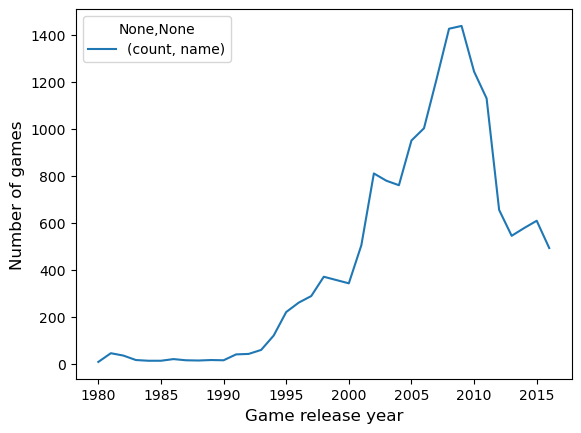

In [37]:
gy = games_per_year.plot()
gy.set_xlabel("Game release year", fontsize=12)
gy.set_ylabel("Number of games", fontsize=12);

As you can see from the graph and the table, until 1993 very few games were produced (up to 100), since not everyone had computers, and the console market was not so highly developed. In 1995, a noticeable growth began, and continued until 2009, after which it began to decline. Apparently, the global financial crisis has affected the entire gaming industry.

In [38]:
len(data.query('year_of_release < 1993')) / len(data) * 100

1.8532020901689146

The data before 1993 is less than 2%, so we will discard it

In [39]:
data = data.query('year_of_release > 1993')

### Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years. How long does it take for new platforms to appear and old ones to disappear?

In [40]:
games_per_platform = (data.pivot_table(index = 'platform', values=['total_sales'], aggfunc = ['sum', 'count'])
                      .rename(columns={'sum':'Sales Amount', 'count':'Number of games'})
                      .droplevel(1,axis=1)).sort_values(by='Sales Amount', ascending=False)
games_per_platform

,Sales Amount,Number of games
platform,,
PS2,1247.28,2134
X360,961.30,1234
PS3,931.34,1306
Wii,891.18,1286
DS,802.77,2121
PS,727.40,1189
PS4,314.14,392
GBA,312.88,811
PSP,289.54,1194


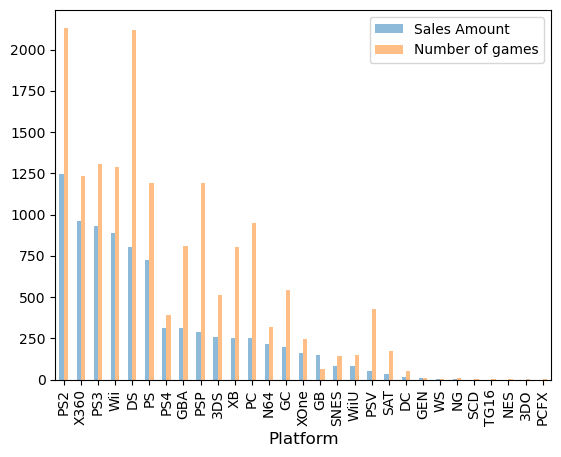

In [41]:
gp = games_per_platform.plot(kind='bar', alpha=0.5)
gp.set_xlabel("Platform", fontsize=12)
gy.set_ylabel("Number of games", fontsize=12);

Consider only the first 7 platforms

In [42]:
games_per_platform = games_per_platform.head(7)
games_per_platform

,Sales Amount,Number of games
platform,,
PS2,1247.28,2134
X360,961.30,1234
PS3,931.34,1306
Wii,891.18,1286
DS,802.77,2121
PS,727.40,1189
PS4,314.14,392


Let's look at the most popular platforms

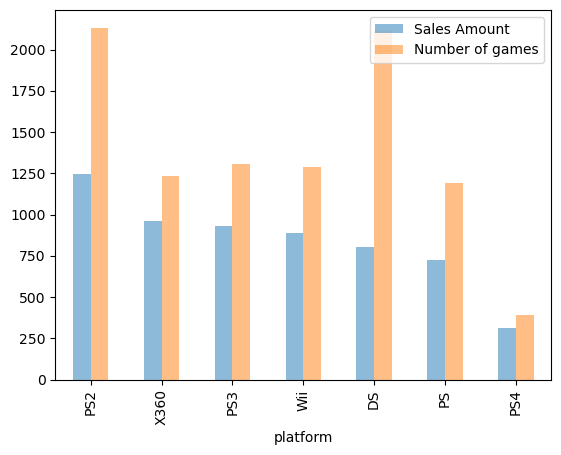

In [43]:
games_per_platform.plot(kind='bar', alpha=0.5);

Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years

In [44]:
(data.pivot_table(
    index = ['year_of_release', 'platform'], values=['total_sales'], aggfunc = ['sum'])
).rename(columns={'sum':'Sales Amount'}
        ).droplevel(1,axis=1
                   ).sort_values(by=['year_of_release', 'Sales Amount', 'platform'], ascending=False
                                ).head(60)

Sales Amount
year_of_release platform              
2016.0          PS4              68.69
                XOne             26.09
                3DS              15.14
                PC                5.22
                WiiU              4.60
                PSV               4.07
                PS3               3.40
                X360              1.52
                Wii               0.18
2015.0          PS4             119.40
                XOne             60.18
                3DS              27.78
                PS3              16.96
                WiiU             16.35
                X360             11.93
                PC                8.54
                PSV               6.42
                Wii               1.14
                PSP               0.12
2014.0          PS4             100.03
                XOne             54.09
                PS3              46.89
                3DS              43.76
                X360             34.34
                WiiU             22.03
                PC               13.29
                PSV              11.72
                Wii               3.75
                PSP               0.15
2013.0          PS3             113.67
                X360             89.01
                3DS              56.57
                PS4              26.02
                WiiU             21.65
                XOne             18.96
                PC               12.38
                PSV              10.60
                Wii               8.59
                PSP               2.86
                DS                1.54
2012.0          PS3             107.61
                X360             99.74
                3DS              50.18
                PC               23.22
                Wii              21.71
                WiiU             17.56
                PSV              16.31
                DS               11.01
                PSP               7.82
2011.0          PS3             156.17
                X360            143.59
                3DS              63.88
                Wii              59.58
                PC               35.03
                DS               26.18
                PSP              17.49
                PSV               4.69
                PS2               0.45
2010.0          X360            168.62
                PS3             140.34

In [45]:
games_per_platform_per_year = (data.pivot_table(index = ['year_of_release', 'platform'], values=['total_sales'], aggfunc = ['sum', 'count'])
                              ).rename(columns={'sum':'Sales Amount', 'count':'Number of games'}).droplevel(1,axis=1).sort_values(by=['year_of_release', 'Sales Amount'], ascending=True)


As you can see, from 2010 to 2013 in the top three most popular platforms X360, PS3 and 3DS, in 2013 PS4 appears and from 2014 to 2016 this platform invariably holds the first position, replacing PS3, and XOne comes instead of X360.

Thus, on average, the new platform holds the leading position for 4 years, so we can assume that in 2017 the leaders will be PS4, XOne and 3DS

### Let's take the data for the corresponding actual period - from 2013 to 2016.

### We will not take into account the data for previous years.

In [46]:
games_after_2013 = data.query('year_of_release >= 2013')
games_after_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Find out which platforms are leading in sales, growing or falling. Let's choose a few potentially profitable platforms.

In [47]:
platforms_after_2013 = (games_after_2013
                        .pivot_table(index = ['platform', 'year_of_release'], values=['total_sales'], aggfunc = ['sum'])
                       ).rename(columns={'sum' : 'Total Sales'}).droplevel(1,axis=1)


In [48]:
platforms_after_2013

Total Sales
platform year_of_release             
3DS      2013.0                 56.57
         2014.0                 43.76
         2015.0                 27.78
         2016.0                 15.14
DS       2013.0                  1.54
PC       2013.0                 12.38
         2014.0                 13.29
         2015.0                  8.54
         2016.0                  5.22
PS3      2013.0                113.67
         2014.0                 46.89
         2015.0                 16.96
         2016.0                  3.40
PS4      2013.0                 26.02
         2014.0                100.03
         2015.0                119.40
         2016.0                 68.69
PSP      2013.0                  2.86
         2014.0                  0.15
         2015.0                  0.12
PSV      2013.0                 10.60
         2014.0                 11.72
         2015.0                  6.42
         2016.0                  4.07
Wii      2013.0                  8.59
         2014.0                  3.75
         2015.0                  1.14
         2016.0                  0.18
WiiU     2013.0                 21.65
         2014.0                 22.03
         2015.0                 16.35
         2016.0                  4.60
X360     2013.0                 89.01
         2014.0                 34.34
         2015.0                 11.93
         2016.0                  1.52
XOne     2013.0                 18.96
         2014.0                 54.09
         2015.0                 60.18
         2016.0                 26.09

We see that sales on the 3DS, PC, PS3, PSP, PSV, Wii, WiiU, X360 platforms are falling, on the PS4, XOne platforms they are growing. Accordingly, the most profitable for 2017 are PS4 and XOne

### Let's plot a "box with a mustache" graph of global game sales by platform.

In [49]:
platforms = games_after_2013['platform'].unique()
platforms

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

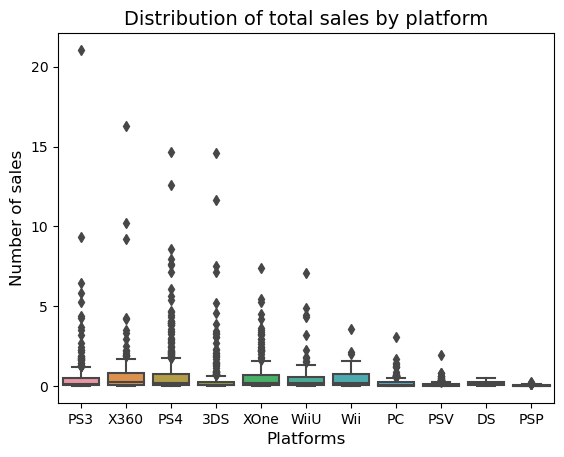

In [50]:
bp = sns.boxplot(x=games_after_2013['platform'], y=games_after_2013['total_sales'])
bp.axes.set_title("Distribution of total sales by platform", fontsize=14)
bp.set_xlabel("Platforms", fontsize=12)
bp.set_ylabel("Number of sales", fontsize=12);


Let's try to split the graph into several ones in order to study the spread of values ​​in more detail.

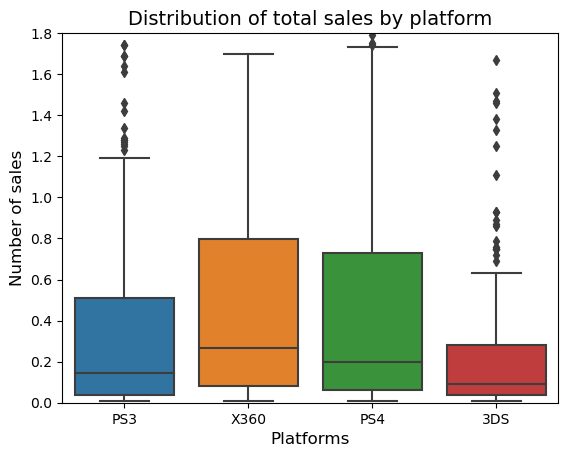

In [51]:
bp1 = sns.boxplot(x=games_after_2013
                 .query('platform == "PS3" | platform == "X360" | platform == "PS4" | platform == "3DS"')['platform'],
                 y=games_after_2013.query('platform == "PS3" | platform == "X360" | platform == "PS4" | platform == "3DS"')['total_sales'])
bp1.axes.set_title("Distribution of total sales by platform", fontsize=14)
bp1.set_xlabel("Platforms", fontsize=12)
bp1.set_ylabel("Number of sales", fontsize=12)
bp1.set_ylim([0,1.8]);

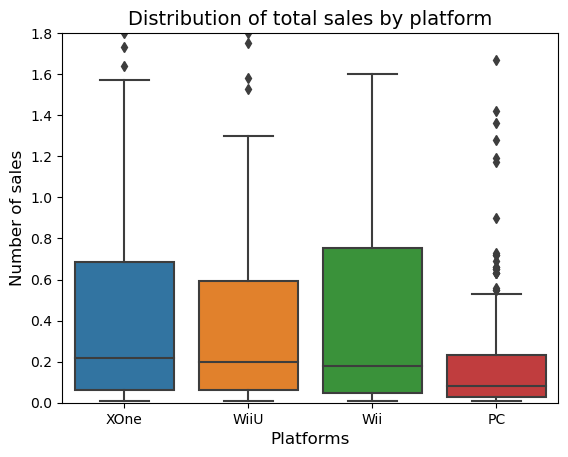

In [52]:
bp2 = sns.boxplot(x=games_after_2013
                 .query('platform == "XOne" | platform == "WiiU" | platform == "Wii" | platform == "PC"')['platform'],
                 y=games_after_2013.query('platform == "XOne" | platform == "WiiU" | platform == "Wii" | platform == "PC"')['total_sales'])
bp2.axes.set_title("Distribution of total sales by platform", fontsize=14)
bp2.set_xlabel("Platforms", fontsize=12)
bp2.set_ylabel("Number of sales", fontsize=12)
bp2.set_ylim([0,1.8]);

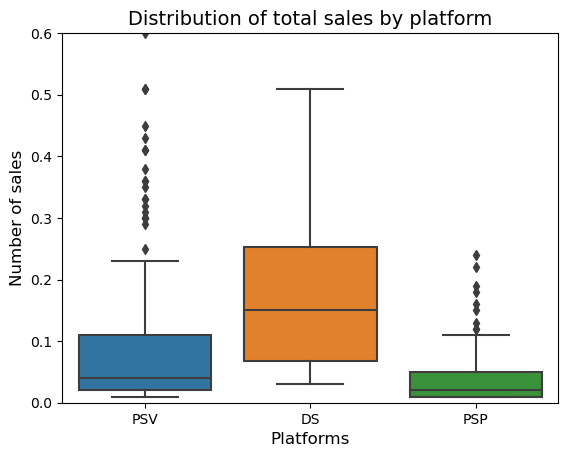

In [53]:
bp3 = sns.boxplot(x=games_after_2013
                 .query('platform == "PSV" | platform == "DS" | platform == "PSP"')['platform'],
                 y=games_after_2013.query('platform == "PSV" | platform == "DS" | platform == "PSP"')['total_sales'])
bp3.axes.set_title("Distribution of total sales by platform", fontsize=14)
bp3.set_xlabel("Platforms", fontsize=12)
bp3.set_ylabel("Number of sales", fontsize=12)
bp3.set_ylim([0,0.6]);

The median for the most popular platforms ranges from $0.15 million to $0.3 million per game.

The upper limit of the limit, beyond which anomalies are already being determined, for two platforms - PS3 and X360 - at the level of 1.6 - 1.7 million dollars.
Wii, WiiU, XOne - from 1 to 1.5 million dollars.

Among the popular platforms, PC and 3DS stand out - their figures are much lower, the median is less than 0.1 million dollars, the upper limit is 0.6 million.

### Let's see how the reviews of users and critics affect sales within one popular platform. Let's build a scatterplot and calculate the correlation between reviews and sales.

Consider PS4

In [54]:
ps4 = games_after_2013.query('platform == "PS4"')
ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Unknown,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Unknown,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


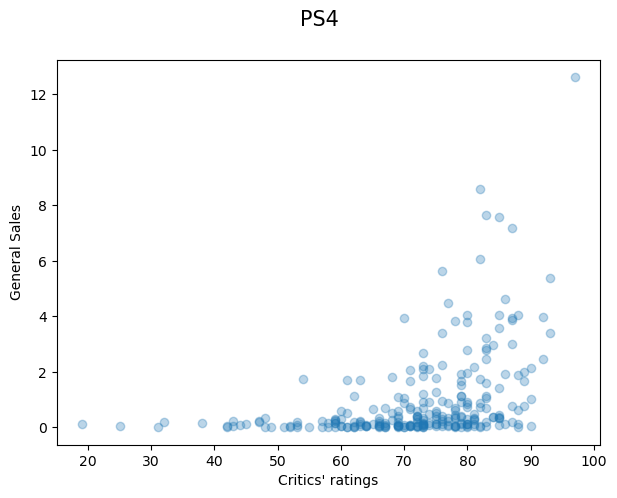

In [55]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x = ps4.query('critic_score > 0')['critic_score'], y = ps4.query('critic_score > 0')['total_sales'], alpha=0.3)
plt.xlabel("Critics' ratings")
plt.ylabel("General Sales")
fig.suptitle('PS4', fontsize=15)
plt.show()

In [56]:
ps4['critic_score'].corr(ps4['total_sales'])

0.22652606614612364

As you can see, the correlation between critics' ratings and overall sales is small.

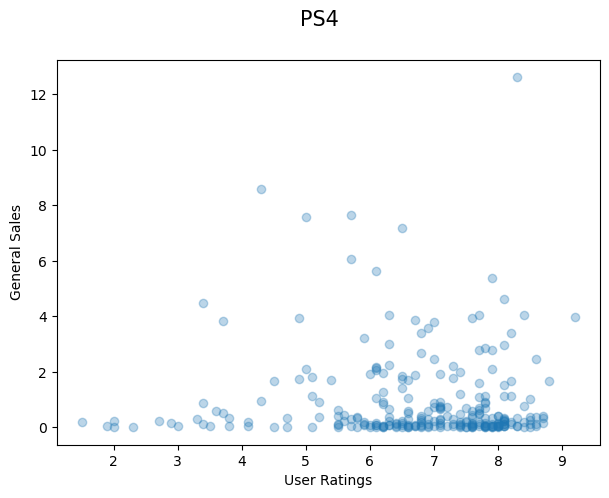

In [57]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x = ps4.query('user_score > 0')['user_score'], y = ps4.query('user_score > 0')['total_sales'], alpha=0.3)
plt.xlabel("User Ratings")
plt.ylabel("General Sales")
fig.suptitle('PS4', fontsize=15)
plt.show()

In [58]:
ps4['user_score'].corr(ps4['total_sales'])

0.11596149312860111

The correlation coefficient between user ratings and total sales is even smaller, and it is negative, that is, as the values in the user ratings column increase, the values in the total sales column tend to decrease

### Let's correlate the findings with sales of games on other platforms.

Let's see the indications for the platform XOne

In [59]:
x_one = games_after_2013.query('platform == "XOne" & user_score > 0 & critic_score > 0')
x_one

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,Agatha Christie's The ABC Murders,XOne,2016.0,Adventure,0.01,0.00,0.00,0.00,66.0,7.5,Unknown,0.01
16392,Goat Simulator,XOne,2016.0,Simulation,0.00,0.01,0.00,0.00,53.0,6.3,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01


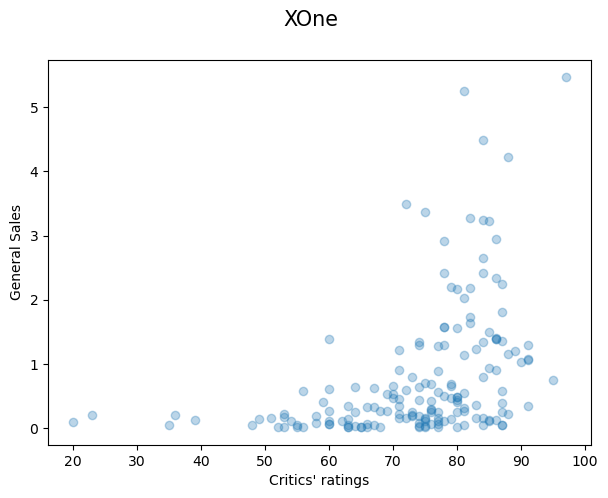

In [60]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x = x_one['critic_score'], y = x_one['total_sales'], alpha=0.3)
plt.xlabel("Critics' ratings")
plt.ylabel("General Sales")
fig.suptitle('XOne', fontsize=15)
plt.show()

In [61]:
x_one['critic_score'].corr(x_one['total_sales'])

0.41042203561296403

As you can see, the correlation, like with PS4, between critics' ratings and overall sales is small.

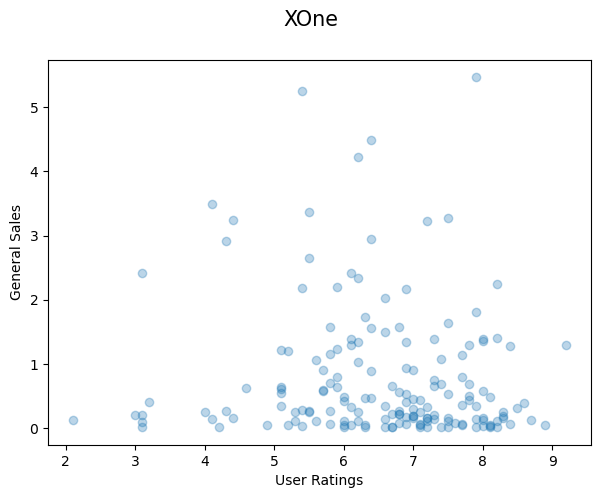

In [62]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(x = x_one['user_score'], y = x_one['total_sales'], alpha=0.3)
plt.xlabel("User Ratings")
plt.ylabel("General Sales")
fig.suptitle('XOne', fontsize=15)
plt.show()

In [63]:
x_one['user_score'].corr(x_one['total_sales'])

-0.09400318326920862

And here is the same picture as the PS4

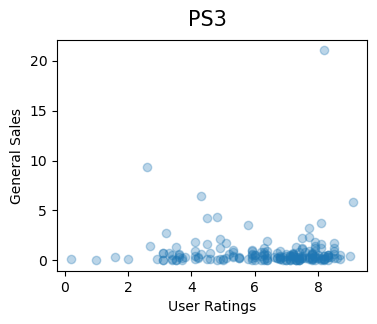

Correlation coefficient 0.0023944027357566872


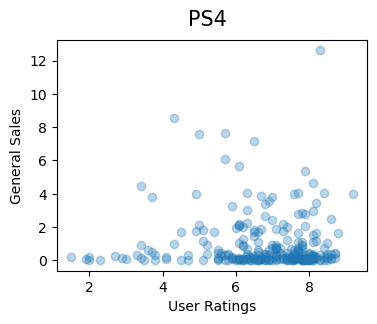

Correlation coefficient -0.03195711020455646


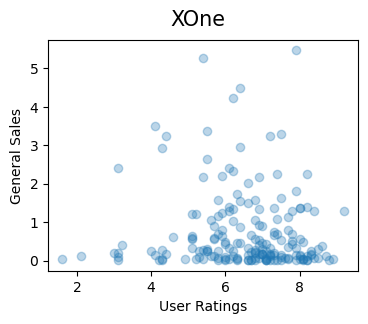

Correlation coefficient -0.06892505328279418


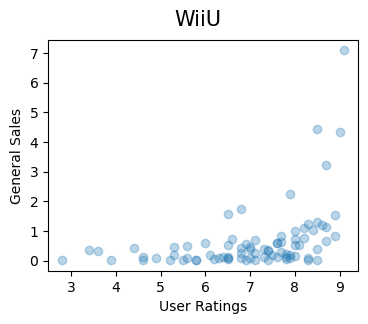

Correlation coefficient 0.41933048192661854


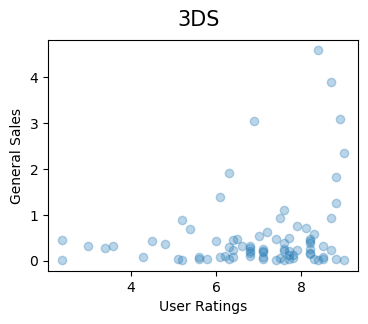

Correlation coefficient 0.24150411773563005


In [64]:
g_user = games_after_2013.query('user_score > 0')
g_critic = games_after_2013.query('critic_score > 0')

for i in ['PS3', 'PS4', 'XOne', 'WiiU', '3DS']:
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.scatter(x = g_user.query('platform == @i')['user_score'], y = g_user.query('platform == @i')['total_sales'], alpha=0.3)
    plt.xlabel("User Ratings")
    plt.ylabel("General Sales")
    fig.suptitle(i, fontsize=15)
    plt.show()
    print('Correlation coefficient', g_user.query('platform == @i')['user_score'].corr(g_user.query('platform == @i')['total_sales']))

The amount of sales is almost always not directly related to user ratings.

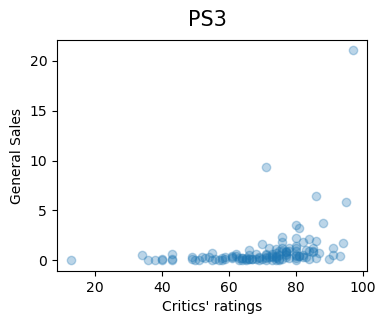

Correlation coefficient 0.33428533933719184


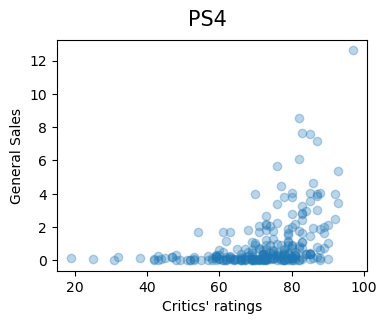

Correlation coefficient 0.4065679020617814


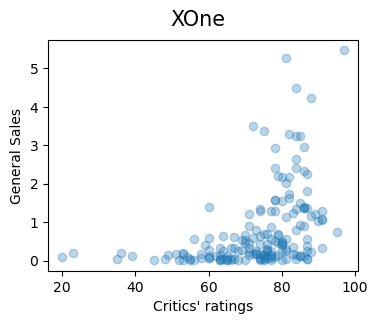

Correlation coefficient 0.4169983280084015


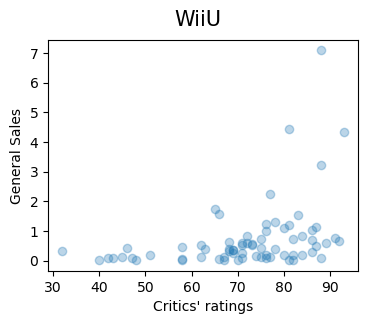

Correlation coefficient 0.3764149065423913


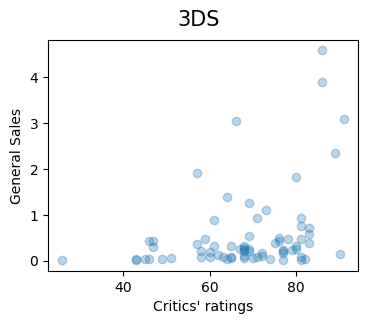

Correlation coefficient 0.3570566142288105


In [65]:
 for i in ['PS3', 'PS4', 'XOne', 'WiiU', '3DS']:
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.scatter(x = g_critic.query('platform == @i')['critic_score'], y = g_critic.query('platform == @i')['total_sales'], alpha=0.3)
    plt.xlabel("Critics' ratings")
    plt.ylabel("General Sales")
    fig.suptitle(i, fontsize=15)
    plt.show()
    print('Correlation coefficient', g_critic.query('platform == @i')['critic_score'].corr(g_critic.query('platform == @i')['total_sales']))

With an increase in the average rating of critics, the average level of revenue from the sale of games also increases, which is logical: the better the game, the more money it brings to the developer and manufacturer.

### Let's look at the general distribution of games by genre.

In [66]:
games_after_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [67]:
genres = (games_after_2013
.pivot_table(index = 'genre', values = ['total_sales', 'name'], aggfunc = {'total_sales':'sum', 'name':'count'}
                                     ).sort_values(by='total_sales', ascending=False)
)
genres

,name,total_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,206,149.59
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


The most profitable genres are Action, Shooter, Sports and Role-Playing, while the least money-making genres are Strategy and Puzzle

In [68]:
genres['average_price'] = genres['total_sales'] / genres['name']
genres = genres.sort_values(by='average_price', ascending=False)
genres

,name,total_sales,average_price
genre,,,
Shooter,187,232.98,1.245882
Sports,206,149.59,0.726165
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


We get that the most profitable genres in the ratio of money earned from one game are Shooter, Sports and Platform, because. they have average prices per game of $1.24, $0.72 and $0.57 million respectively

In [69]:
genres = (games_after_2013
.pivot_table(index = 'genre', values = ['total_sales', 'name'], aggfunc = {'total_sales':'sum', 'name':'count'}
                                     )
).sort_values(by='total_sales', ascending=False)
genres


,name,total_sales
genre,,
Action,766,321.87
Shooter,187,232.98
Sports,206,149.59
Role-Playing,292,145.89
Misc,155,62.82
Platform,74,42.63
Racing,85,39.89
Fighting,80,35.31
Adventure,245,23.64


Judging by the median values, the leaders in terms of price are games in the genres Shooter, Sports and Platform

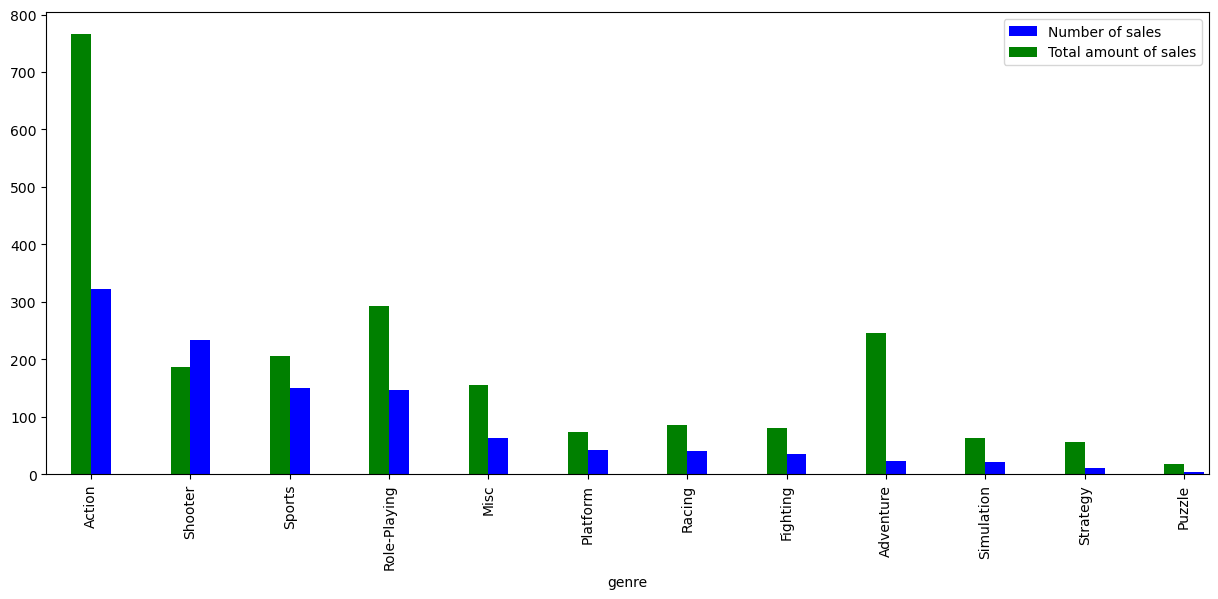

In [70]:
ax = plt.gca()

plot1 = genres['total_sales']
plot1.plot(kind='bar', figsize=(15,6), width=0.2, color='b', position=0)

plot2 = genres['name']
plot2.plot(kind='bar', figsize=(15,6), width=0.2, color='g', position=1)

ax.legend(['Number of sales', 'Total amount of sales']);

The Action, Role-Playing and Adventure genres brought in the most money, the Action, Shooter and Sports genres produced the most games.

In [71]:
genres = (games_after_2013
.pivot_table(index = 'genre', values = ['total_sales', 'name'], aggfunc = {'total_sales':'median', 'name':'count'}
                                     )
).sort_values(by='total_sales', ascending=False)
genres


,name,total_sales
genre,,
Shooter,187,0.450
Sports,206,0.250
Platform,74,0.225
Role-Playing,292,0.125
Fighting,80,0.125
Racing,85,0.120
Action,766,0.110
Simulation,62,0.100
Misc,155,0.100


Judging by the median values, the leaders in terms of price are games in the genres Shooter, Sports and Platform

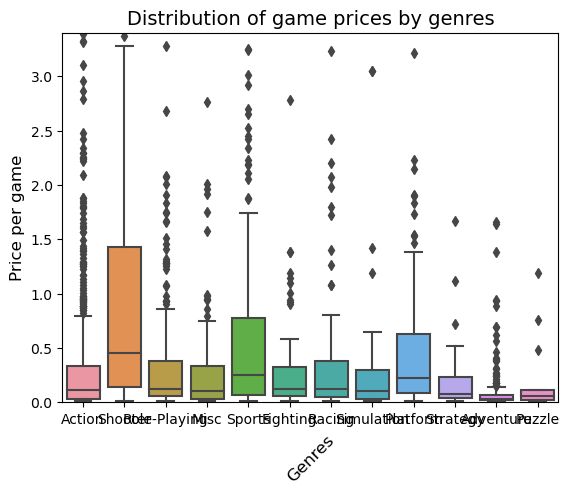

In [72]:
bp4 = sns.boxplot(x=games_after_2013['genre'],
                 y=games_after_2013['total_sales'])
bp4.axes.set_title("Distribution of game prices by genres", fontsize=14)
bp4.set_xlabel("Genres", fontsize=12, rotation=45)
#bp4.set_xlabel() = 
#bp4.set_xticklabels(bp4.set_xlabel(), rotation=90)
bp4.set_ylabel("Price per game", fontsize=12)
bp4.set_ylim([0,3.4]);

As we can see from the graph, the median values of the price per game are the highest for X360, XOne, PS4, WiiU, Wii. The Wii, X360, and PS4 upper bounds (non-outliers) are $1.6-1.8 million

## Let's make a portrait of the user of each region

### Let's determine for the user of each region (NA, EU, JP) the most popular platforms (top 5). Let us describe the differences in sales shares.

#### Region NA - North America

In [73]:
platforms_na = games_after_2013.pivot_table(index = 'platform', values = ['na_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='na_sales', ascending=False)
platforms_na['share'] = platforms_na['na_sales'] / sum(platforms_na['na_sales'])
platforms_na.head()

,na_sales,total_sales,share
platform,,,
PS4,108.74,314.14,0.248429
XOne,93.12,159.32,0.212744
X360,81.66,136.80,0.186562
PS3,63.50,180.92,0.145073
3DS,38.20,143.25,0.087272


The most profitable platform in North America is PS4, almost a quarter of all sales

#### Region EU - Europe

In [74]:
platforms_eu = games_after_2013.pivot_table(index = 'platform', values = ['eu_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='eu_sales', ascending=False)
platforms_eu['share'] = platforms_eu['eu_sales'] / sum(platforms_eu['eu_sales'])
platforms_eu.head()

,eu_sales,total_sales,share
platform,,,
PS4,141.09,314.14,0.359712
PS3,67.81,180.92,0.172883
XOne,51.59,159.32,0.131530
X360,42.52,136.80,0.108406
3DS,30.96,143.25,0.078933


The most profitable platform in Europe is also PS4, 36% of all sales

#### JP Region - Japan

In [75]:
platforms_jp = games_after_2013.pivot_table(index = 'platform', values = ['jp_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='jp_sales', ascending=False)
platforms_jp['share'] = platforms_jp['jp_sales'] / sum(platforms_jp['jp_sales'])
platforms_jp.head()

,jp_sales,total_sales,share
platform,,,
3DS,67.81,143.25,0.485328
PS3,22.84,180.92,0.163470
PSV,18.41,32.81,0.131764
PS4,15.96,314.14,0.114228
WiiU,10.88,64.63,0.077870


But in Japan, the most profitable platform is 3DS, and PS4 is not even in the top three.

### Let's determine for the user of each region (NA, EU, JP) the most popular genres (top 5).

#### Region NA - North America

In [76]:
genres_na = games_after_2013.pivot_table(index = 'genre', values = ['na_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='na_sales', ascending=False)
genres_na['share'] = genres_na['na_sales'] / sum(genres_na['na_sales'])
genres_na.head()

,na_sales,total_sales,share
genre,,,
Action,126.05,321.87,0.287976
Shooter,109.74,232.98,0.250714
Sports,65.27,149.59,0.149117
Role-Playing,46.40,145.89,0.106006
Misc,27.49,62.82,0.062804


In North America, the most popular genres are Action and Shooter

#### Region EU - Europe

In [77]:
genres_eu = games_after_2013.pivot_table(index = 'genre', values = ['eu_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='eu_sales', ascending=False)
genres_eu['share'] = genres_eu['eu_sales'] / sum(genres_eu['eu_sales'])
genres_eu.head()

,eu_sales,total_sales,share
genre,,,
Action,118.13,321.87,0.301175
Shooter,87.86,232.98,0.224001
Sports,60.52,149.59,0.154297
Role-Playing,36.97,145.89,0.094256
Racing,20.19,39.89,0.051475


In Europe, the most popular genres are also Action and Shooter

#### JP Region - Japan

In [78]:
genres_jp = games_after_2013.pivot_table(index = 'genre', values = ['jp_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='jp_sales', ascending=False)
genres_jp['share'] = genres_jp['jp_sales'] / sum(genres_jp['jp_sales'])
genres_jp.head()

,jp_sales,total_sales,share
genre,,,
Role-Playing,51.04,145.89,0.365302
Action,40.49,321.87,0.289794
Misc,9.20,62.82,0.065846
Fighting,7.65,35.31,0.054752
Shooter,6.61,232.98,0.047309


Japan excelled again - here the most popular genres are Role-Playing and Action, and less than 5% of players play shooters. I think this distribution is related to the most popular platforms

### Find out if the ESRB rating affects sales in a particular region

In [79]:
rating_na = games_after_2013.pivot_table(index = 'rating', values = ['na_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='na_sales', ascending=False)
rating_na['share'] = rating_na['na_sales'] / sum(rating_na['na_sales'])
rating_na

,na_sales,total_sales,share
rating,,,
M,165.21,371.68,0.377442
Unknown,89.42,275.78,0.204291
E,79.05,200.16,0.180599
E10+,54.24,115.39,0.123918
T,49.79,126.62,0.113751


In North America, 37.7% of sales come from M-rated games - Mature, with 20% of games rated unknown

In [80]:
rating_eu = games_after_2013.pivot_table(index = 'rating', values = ['eu_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='eu_sales', ascending=False)
rating_eu['share'] = rating_eu['eu_sales'] / sum(rating_eu['eu_sales'])
rating_eu

,eu_sales,total_sales,share
rating,,,
M,145.32,371.68,0.370497
E,83.36,200.16,0.212528
Unknown,78.91,275.78,0.201183
E10+,42.69,115.39,0.108839
T,41.95,126.62,0.106953


In Europe, 37% of sales come from games rated M (Mature) - almost the same as in North America, and the same as in North America, the rating of 20% of games is unknown

In [81]:
rating_jp = games_after_2013.pivot_table(index = 'rating', values = ['jp_sales', 'total_sales'], aggfunc = 'sum'
                                        ).sort_values(by='jp_sales', ascending=False)
rating_jp['share'] = rating_jp['jp_sales'] / sum(rating_jp['jp_sales'])
rating_jp

,jp_sales,total_sales,share
rating,,,
Unknown,83.99,275.78,0.601131
T,20.59,126.62,0.147366
E,15.14,200.16,0.108360
M,14.11,371.68,0.100988
E10+,5.89,115.39,0.042156


In Japan, the picture is quite different: 60% of games are rated unknown, 14% of sales come from T-rated games (teen), 10.8% from E-rated games (for everyone), and only 10% from games rated M (for adults)

It turns out that the ESRB rating is for labeling games for the US and Canada. It is also used in Europe, but in Japan it is rather rare.

## Hypothesis testing:

### The average user ratings of the Xbox One and PC platforms are the same

Null hypothesis - the average user ratings of platforms (that is, scores from the user_score column) Xbox One and PC are the same, alternative - the ratings are different

In [82]:
pc = games_after_2013.query('platform == "PC" & user_score > 0')
pc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1095,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67
1351,SimCity (2013),PC,2013.0,Simulation,0.48,0.77,0.0,0.17,64.0,2.2,E10+,1.42
1437,Battlefield 4,PC,2013.0,Shooter,0.39,0.87,0.0,0.10,81.0,6.0,M,1.36
1530,Fallout 4,PC,2015.0,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16456,Fallout Anthology,PC,2015.0,Action,0.00,0.01,0.0,0.00,-1.0,8.3,Unknown,0.01
16463,TrackMania Turbo,PC,2016.0,Action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
16509,Ride 2,PC,2016.0,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,PC,2014.0,Sports,0.00,0.01,0.0,0.00,-1.0,1.4,E,0.01


In comparison, we will use only games that have a rating from the player.

We already defined the x_one variable earlier (in paragraph 3.8), this rule also applies to it

In [83]:
x_one

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16322,Agatha Christie's The ABC Murders,XOne,2016.0,Adventure,0.01,0.00,0.00,0.00,66.0,7.5,Unknown,0.01
16392,Goat Simulator,XOne,2016.0,Simulation,0.00,0.01,0.00,0.00,53.0,6.3,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01


In [84]:
pc['user_score'].describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [85]:
x_one['user_score'].describe()

count    165.000000
mean       6.538182
std        1.340298
min        2.100000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [86]:
results = st.ttest_ind(pc['user_score'], x_one['user_score'], equal_var = True)
# equal_var - whether to consider the sample variances equal, we have them similar
alpha = 0.05
if results.pvalue < alpha:
    print("p-value: {}\nDon't reject the null hypothesis".format(results.pvalue))
else:
    print('p-value: {}\nReject the null hypothesis'.format(results.pvalue))

p-value: 0.12200801919971735
Reject the null hypothesis


The average user ratings of the Xbox One and PC platforms differ from each other, the hypothesis is incorrect

###  The next hypothesis is that the average user ratings of the Action and Sports genres are different.

The null hypothesis is that the average user ratings for the Action and Sports genres are the same.

Alternative hypothesis - the average user ratings of the Action and Sports genres are different

In [87]:
action = games_after_2013.query('genre == "Action" & user_score > 0')
action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013.0,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16652,Fast Racing Neo,WiiU,2016.0,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16654,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,-1.0,5.1,E10+,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,Unknown,0.01


In [88]:
action['user_score'].describe()

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [89]:
sports = games_after_2013.query('genre == "Sports" & user_score > 0')
sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,-1.0,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16142,MLB 15: The Show,PSV,2015.0,Sports,0.01,0.00,0.00,0.00,-1.0,8.8,E,0.01
16146,Don Bradman Cricket 14,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,73.0,6.9,E,0.01
16450,Turbo: Super Stunt Squad,X360,2013.0,Sports,0.00,0.01,0.00,0.00,-1.0,4.5,E,0.01
16518,Rugby World Cup 2015,PC,2014.0,Sports,0.00,0.01,0.00,0.00,-1.0,1.4,E,0.01


In [90]:
sports['user_score'].describe()

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [91]:
results = st.ttest_ind(sports['user_score'], action['user_score'], equal_var = False)
# equal_var - whether to consider the variances of the samples equal, they are not equal in our case
alpha = 0.05
if results.pvalue > alpha:
    print('p-value: {}\nReject the null hypothesis'.format(results.pvalue))
else:
    print("p-value: {}\nDon't reject the null hypothesis".format(results.pvalue))

p-value: 1.4460039700704315e-20
Don't reject the null hypothesis


Thus, we do not reject the null hypothesis, which means that the statement that the average user ratings of the Action and Sports genres are the same is true.

Since we were comparing two populations, we used the ttest_ind method to test hypotheses, and compared the p-value with a pre-selected alpha = 0.05

## Conclusion

According to the results of the study, if the trend continues, we can draw the following conclusions:

Action, Shooter and Sports games on PS4, XOne and X360 platforms will gain popularity and bring in the most money in North America

Action, Shooter and Sports games on PS4, PS3 and XOne platforms will gain popularity and bring in the most money in Europe

In Japan - games on the 3DS, PS3 and PSV platforms, in the Role-Playing, Action and Misc genres.

Adult games sold more in North America and Europe, teen games and games for everyone in Japan

PC games are losing their popularity - in all regions this platform is not even at least in the top three, and this suggests that games on consoles are gaining more and more popularity - mainly from the PlayStation and Xbox series